Test Phase4_3d file

In [79]:
# install anaconda: https://www.anaconda.com/products/individual
# if use Visual Studio Code, install python extension and select the python interpreter that includes anaconda
# install micropip: https://pypi.org/project/micropip/. You can also run anaconda prompt and type "pip install micropip"
import numpy as np
import micropip
await micropip.install("scipy")

In [80]:
from Phase4_trace_3d import Phase4_trace_3d
from generateTestPositions import generateTestPositions
# Cell 4
# Testing with dummy data
NumOfDataPoints = 3
clusterness = 0.1 # smaller number the more clustered
# Input conditions
initial_positions = []
v = []
for i in range(NumOfDataPoints):
    [x,y,z] = np.random.rand(3)*clusterness
    initial_positions.append([x, y, z])
    vel = lambda t: [np.random.rand(1) * np.sin(t), np.random.rand(1) * np.cos(t), 1]
    v.append(vel)

noise = 1e-3
theta_degrees = 1.8
rev = 5  # revolutions of camera for the entire process
NOS = int(rev * 360 / theta_degrees)
NOS_per_section = 150  # must be larger than 5 to satisfy equations
camera_speed = 0.5  # in Hz or revolution per second
SRD = 1  # m, Source-Reference Distance
RDD = 1  # m, Reference-Detector (screen) Distance
radius = 1

method = 'acceleration'
dataPiling = 'serial'

# Auto-calculations of the rest of the parameters derived from the setting above
delta_T = camera_speed * theta_degrees / 360
shots_per_second = 1 / delta_T

# Define the velocity function
# v = lambda t: [0.9 * np.sin(t), 0.9 * np.cos(t), 1]

# Pack conditions into a list
conditions = [noise, delta_T, NOS, theta_degrees, NOS_per_section, SRD, RDD,method,dataPiling]

xz_proj = np.zeros((NOS, NumOfDataPoints*2))
real_positions = np.zeros((NOS, NumOfDataPoints*3))
# Generate test positions
for i in range(NumOfDataPoints):
    vel = v[i]
    xz_proj[:,i*2:i*2+2], real_positions[:,i*3:i*3+3]= generateTestPositions(vel, initial_positions[i], conditions)

In [81]:
# Print the first few rows of the generated data
print("xz_proj:")
print(xz_proj[:])
print("real_positions:")
print(real_positions[:])

xz_proj:
[[1.53968463e-02 9.13031226e-04 1.61897244e-02 1.74027217e-02
  1.25242423e-02 1.58948135e-02]
 [1.61862556e-02 6.13168016e-03 1.82220881e-02 2.19841481e-02
  1.35442226e-02 1.97189904e-02]
 [1.73039961e-02 1.01856666e-02 1.95990336e-02 2.73138008e-02
  1.30385844e-02 2.54656330e-02]
 ...
 [1.84580629e+00 2.93756373e+00 1.84532383e+00 2.94461150e+00
  1.84447783e+00 2.94778058e+00]
 [1.93158431e+00 3.03306212e+00 1.93053597e+00 3.04046563e+00
  1.92955773e+00 3.04338435e+00]
 [2.02050063e+00 3.13429208e+00 2.02027155e+00 3.14265036e+00
  2.01865052e+00 3.14564399e+00]]
real_positions:
[[8.16201264e-03 2.58339859e-03 6.29496189e-04 ... 6.11079820e-03
  1.74843841e-03 7.73600732e-03]
 [8.16482514e-03 4.83339625e-03 3.12949619e-03 ... 6.11361070e-03
  3.99843606e-03 1.02360073e-02]
 [8.17326262e-03 7.08337984e-03 5.62949619e-03 ... 6.12204818e-03
  6.24841966e-03 1.27360073e-02]
 ...
 [1.62513134e+00 5.46600848e-01 2.49312950e+00 ... 1.62308012e+00
  5.45765888e-01 2.50023601e+00

In [82]:
# Import the function directly from the module
from Phase4_trace_3d import Phase4_trace_3d
from smooth_points import smooth_points
import particle_path_finder
from particle_path_finder import track_particles

# Ai recognition caller
alpha = np.radians(theta_degrees)  # Example rotation angle in radians
tracked = track_particles(xz_proj, alpha)
print(tracked)

estimated_positions = np.zeros((NOS,3*NumOfDataPoints))
# Then you can call it just by its name:
for i in range(NumOfDataPoints):
    estimated_positions_single = Phase4_trace_3d(initial_positions, conditions, v[i], xz_proj[:,i*2:i*2+2])
    estimated_positions_single = smooth_points(estimated_positions_single, 'sg',NOS_per_section)
    print(estimated_positions_single.shape)
    print(estimated_positions.shape)
    estimated_positions[:,i*3:i*3+3] = estimated_positions_single



[[1.53968463e-02 9.13031226e-04 1.61897244e-02 1.74027217e-02
  1.25242423e-02 1.58948135e-02]
 [1.61862556e-02 6.13168016e-03 1.35442226e-02 1.97189904e-02
  0.00000000e+00 0.00000000e+00]
 [1.73039961e-02 1.01856666e-02 1.30385844e-02 2.54656330e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.84447783e+00 2.94778058e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.92955773e+00 3.04338435e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.01865052e+00 3.14564399e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
NOS:  1000
NOS_per_Section:  150
prev 900
proj_index 850
last positions [[1.38191405 0.76816052 2.12650784]
 [1.38383233 0.76696832 2.12902979]
 [1.3857484  0.76577109 2.13155222]
 [1.38766227 0.76456881 2.13407514]
 [1.38957394 0.7633615  2.13659855]
 [1.3914834  0.76214915 2.13912244]
 [1.39339065 0.76093176 2.14164681]
 [1.39529571 0.75970934 2.14417167]
 [1.39719855 0.75848187 2.14669701]
 [1.3990992  0.75724936 2.14

In [83]:
print('estimated positions: \n',estimated_positions)
print('real positions: \n',real_positions)

estimated positions: 
 [[8.10223628e-03 2.49639075e-03 6.04583486e-04 ... 6.25517787e-03
  8.24980394e-04 7.71369424e-03]
 [8.09705856e-03 4.76601607e-03 3.10479881e-03 ... 6.25449119e-03
  3.11756967e-03 1.02143641e-02]
 [8.09764329e-03 7.03472060e-03 5.60504009e-03 ... 6.25945358e-03
  5.40898349e-03 1.27150395e-02]
 ...
 [1.62568856e+00 5.46890351e-01 2.49356271e+00 ... 1.62099192e+00
  5.43568389e-01 2.49733952e+00]
 [1.62706581e+00 5.45089638e-01 2.49606263e+00 ... 1.62235058e+00
  5.41710668e-01 2.49980870e+00]
 [1.62843927e+00 5.43284954e-01 2.49856266e+00 ... 1.62370541e+00
  5.39848384e-01 2.50227771e+00]]
real positions: 
 [[8.16201264e-03 2.58339859e-03 6.29496189e-04 ... 6.11079820e-03
  1.74843841e-03 7.73600732e-03]
 [8.16482514e-03 4.83339625e-03 3.12949619e-03 ... 6.11361070e-03
  3.99843606e-03 1.02360073e-02]
 [8.17326262e-03 7.08337984e-03 5.62949619e-03 ... 6.12204818e-03
  6.24841966e-03 1.27360073e-02]
 ...
 [1.62513134e+00 5.46600848e-01 2.49312950e+00 ... 1.6230

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def Phase4Graph(real_positions, estimated_positions, conditions, v, f2):
    noise, delta_T, NOS, theta_degree, N, SRD, RDD, method, dataPiling = conditions
    
    # Ensure that real_positions and estimated_positions are the same length
    real_positions = real_positions[:len(estimated_positions)]
    
    fig = plt.figure(f2, figsize=(20, 16), dpi=100)
    
    ax1 = fig.add_subplot(111, projection='3d')
    
    for i in range(NumOfDataPoints):
        ax1.plot(real_positions[:, i*3], real_positions[:, i*3+1], real_positions[:, i*3+2], 'r', markersize=10)
        ax1.plot(estimated_positions[:, i*3], estimated_positions[:, i*3+1], estimated_positions[:, i*3+2], 'b', linewidth=2)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Real Positions vs Estimated Positions in 3D')
    ax1.legend(['Real Positions', 'Estimated Positions'])
    
    distances = np.linalg.norm(real_positions - estimated_positions, axis=1)
    min_val, min_idx = np.min(distances), np.argmin(distances)
    max_val, max_idx = np.max(distances), np.argmax(distances)
    
    # ax1.text(*real_positions[min_idx], f'Min ({min_idx}): {real_positions[min_idx]}', color='r')
    # ax1.text(*estimated_positions[min_idx], f'Min ({min_idx}): {estimated_positions[min_idx]}', color='b')
    # ax1.text(*real_positions[max_idx], f'Max ({max_idx}): {real_positions[max_idx]}', color='r')
    # ax1.text(*estimated_positions[max_idx], f'Max ({max_idx}): {estimated_positions[max_idx]}', color='b')
    
    print(f'Noise: {noise}\nMin Distance: {min_val}\nMax Distance: {max_val}\nNumber of Shots: {NOS}\nRotation: {theta_degree}\nTime Between Shots: {delta_T}\nNOS Per Section: {N}\nMethod: {method}\nData Piling: {dataPiling}')
    
    v_str = str(v).replace('<function ', '').replace(' at 0x' + hex(id(v))[2:] + '>', '')
    
    print(f'True velocity:\n{v_str}\nt is time elapsed')
    
    plt.show()


Noise: 0.001
Min Distance: 0.00031291709600467173
Max Distance: 0.005305422589299664
Number of Shots: 1000
Rotation: 1.8
Time Between Shots: 0.0025
NOS Per Section: 150
Method: acceleration
Data Piling: serial
True velocity:
[<lambda> at 0x000001E3B23D7600>, <lambda> at 0x000001E3B23D7A60>, <lambda> at 0x000001E3BA106F20>]
t is time elapsed


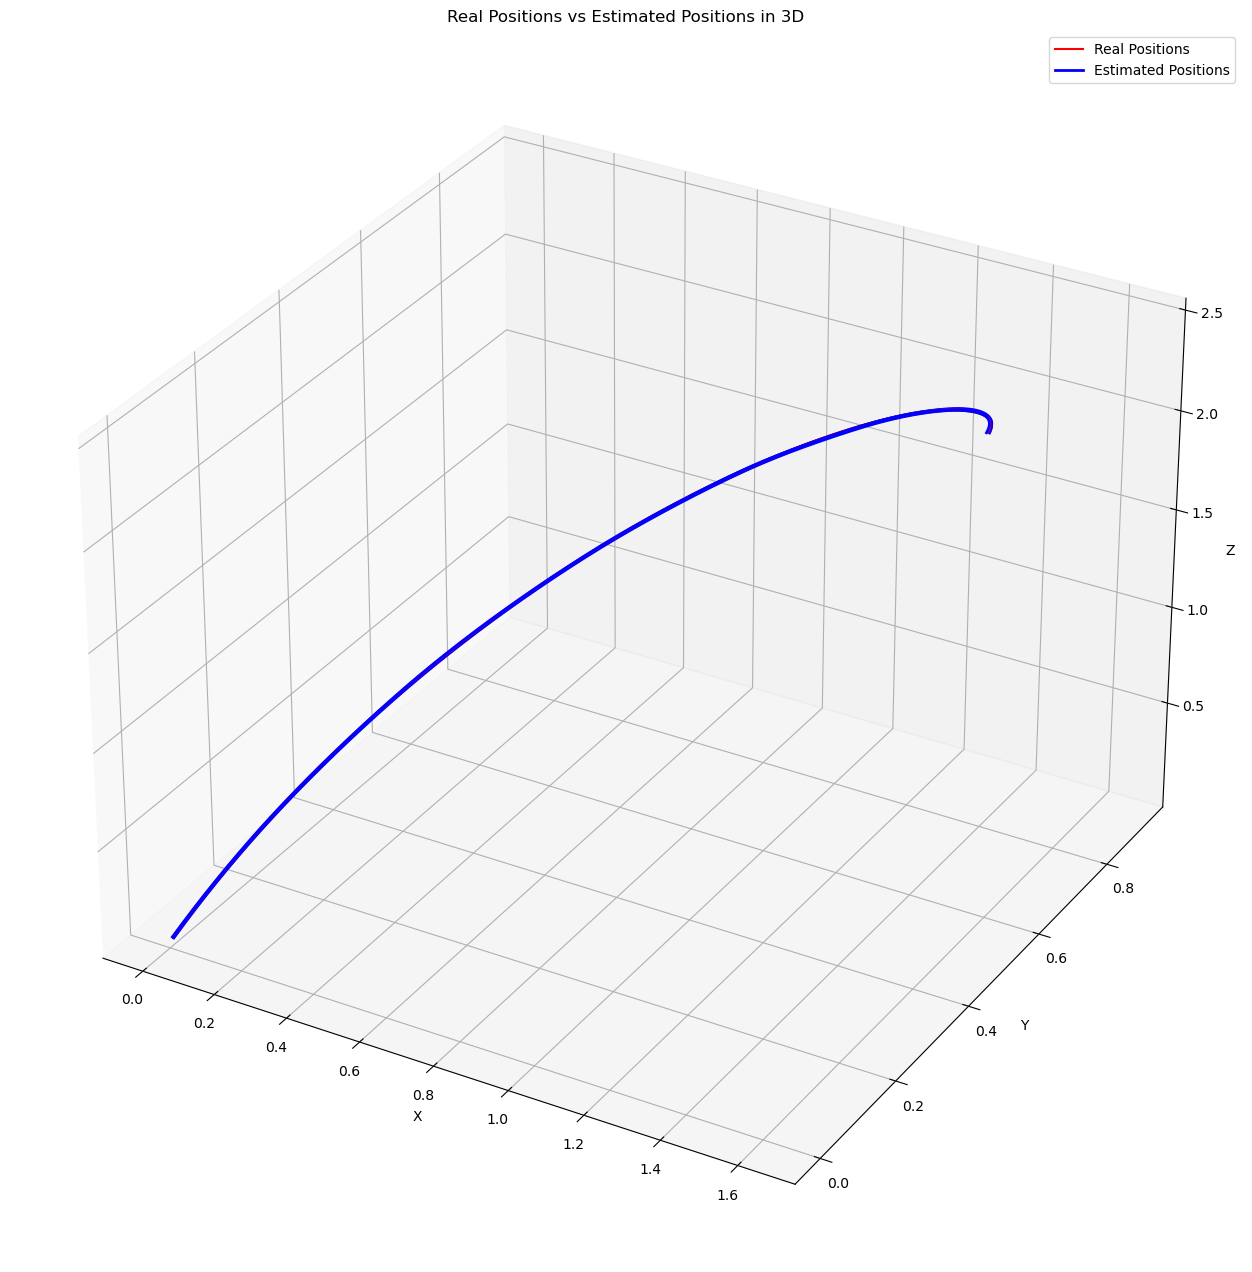

In [85]:
f2 = 0
Phase4Graph(real_positions, estimated_positions, conditions, v, f2)